In [16]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [19]:
train=pd.read_csv('C:\\Users\\USER\\Desktop\\Kidna\\train.csv')
test=pd.read_csv('C:\\Users\\USER\\Desktop\\Kidna\\test.csv')
pd.set_option("display.max_rows", None)

In [22]:
train.head(5)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [23]:
#getting the info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

# preprocessing

In [24]:
train.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name",
           'Institute Name', 'Institute Name', 'Location of Institute', 'Status', 'Place of birth',
           ], axis = 1, inplace = True)

In [34]:
train = train.rename(columns = {'Patient Age':'Patient_Age', "Genes in mother's side":"Genes_in_mothers_side",
            'Inherited from father':'Inherited_from_father',
            'Maternal gene':'Maternal_gene', 'Paternal gene':'Paternal_gene',
            'Blood cell count (mcL) ':'Blood_cell_count', "Father's age":'Fathers_age', "Mother's age":'Mothers_age',
                                 'Respiratory Rate (breaths/min)':'Respiratory_Rate', 'Heart Rate (rates/min':'Heart_Rate',
            'Test 1':'Test_1', 'Test 2':'Test_2', 'Test 3':'Test_3',
            'Test 4':'Test_4', 'Test 5':'Test_5', 'Parental consent': 'Parental_consent', 'Follow-up':'Follow_up', 
             'Birth asphyxia':'Birth_asphyxia',
                                 'Autopsy shows birth defect (if applicable)': 'Autopsy_shows_birth_defect', 
             'Folic acid details (peri-conceptional)':'Folic_acid_details', 
            'H/O serious maternal illness':'HO_serious_maternal_illness',
            'H/O radiation exposure (x-ray)':'HO_radiation_exposure', 'H/O substance abuse':'HO_substance_abuse',
            'Assisted conception IVF/ART':'Assisted_conception_IVFART', 
            'History of anomalies in previous pregnancies':'History_of_anomalies_in_previous_pregnancies',
            'No. of previous abortion':'No_of_previous_abortion', 'Birth defects':'Birth_defects', 
                                'White Blood cell count (thousand per microliter)':'White_Blood_cell_count', 
            'Blood test result':'Blood_test_result',
            'Symptom 1':'Symptom_1', 'Symptom 2':'Symptom_2', 'Symptom 3':'Symptom_3', 'Symptom 4':'Symptom_4', 
            'Symptom 5':'Symptom_5',
            'Genetic Disorder':'Genetic_Disorder', 'Disorder Subclass':'Disorder_Subclass', 
                                'Blood cell count (mcL)': 'Blood_cell_count'})

# EDA

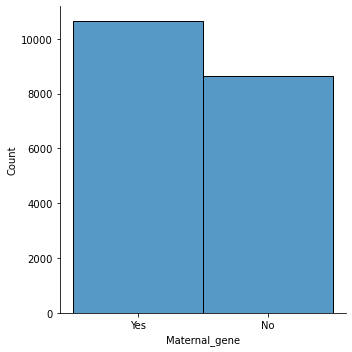

In [39]:
sns.displot(x='Maternal_gene',data=train);

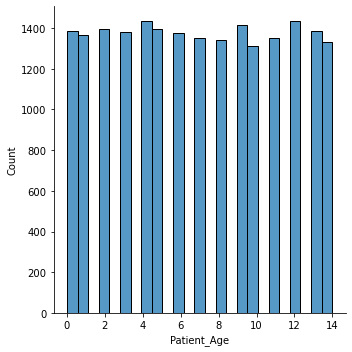

In [41]:
sns.displot(x = 'Patient_Age', data = train);

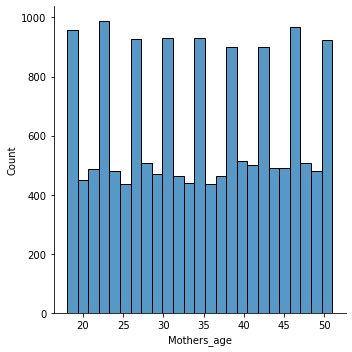

In [43]:
sns.displot(x='Mothers_age',data=train);

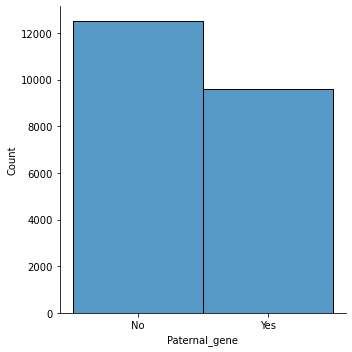

In [44]:
sns.displot(x='Paternal_gene',data=train);

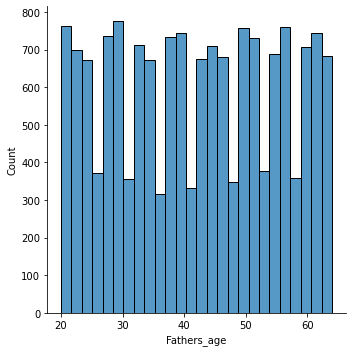

In [45]:
sns.displot(x='Fathers_age',data=train);

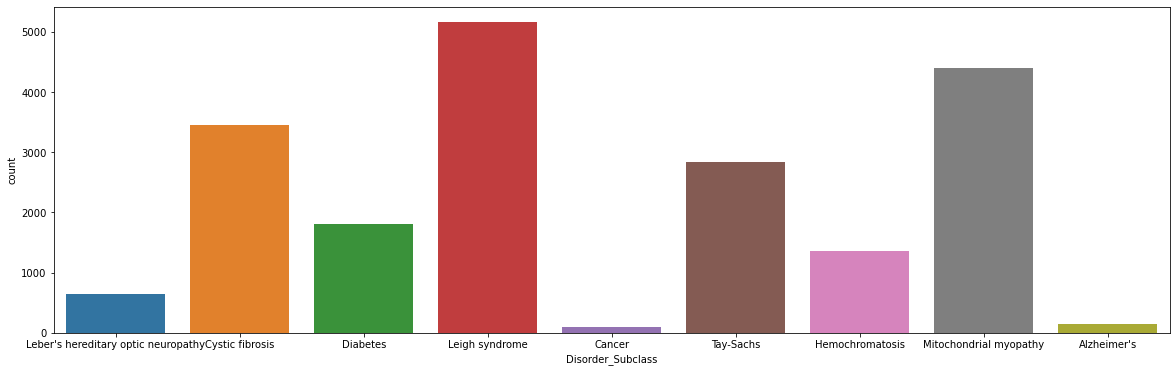

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(x='Disorder_Subclass',data=train);

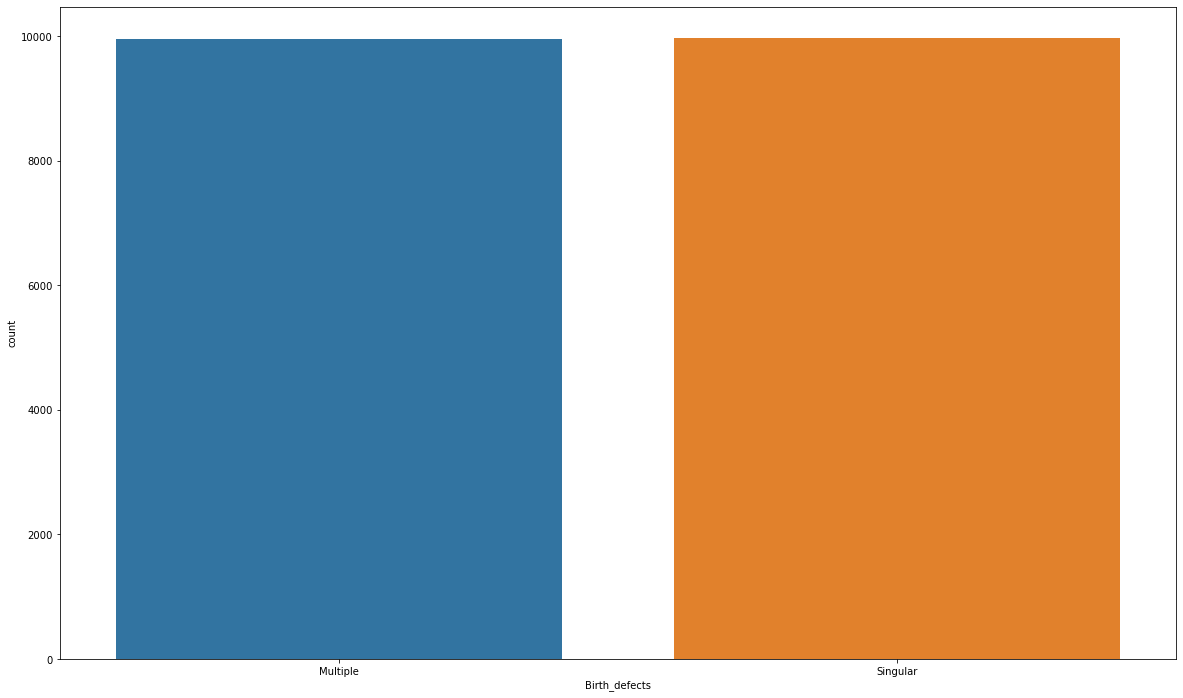

In [56]:
plt.figure(figsize=(20,12))
sns.countplot(x='Birth_defects',data=train);

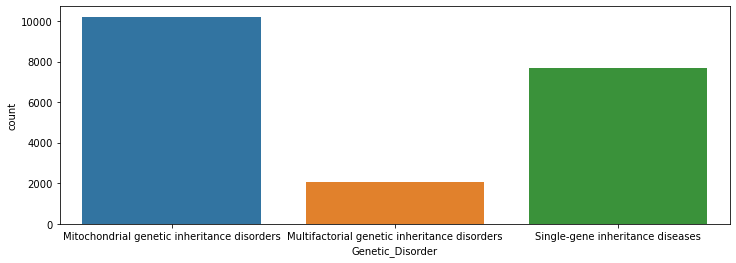

In [57]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = train);

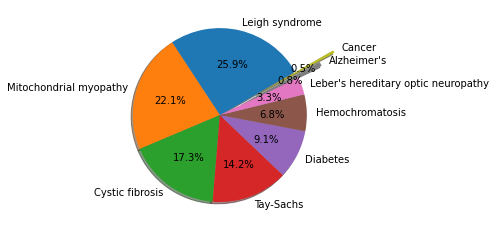

In [59]:
#visualizing in Pie chart
labels1 = 'Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis', "Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer'
explode1 = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.5)

plt.pie(train.Disorder_Subclass.value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=30);

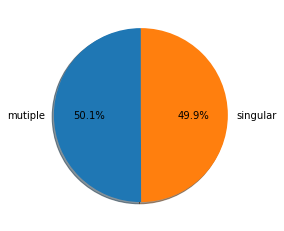

In [61]:
labels2='mutiple','singular'
explode2=(0,0)
plt.pie(train.Birth_defects.value_counts(),explode=explode2,labels=labels2,autopct='%1.1f%%',shadow=True,startangle=90);

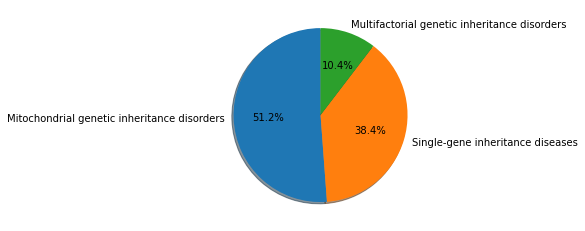

In [62]:
labels3 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode3 = (0, 0, 0)

plt.pie(train.Genetic_Disorder.value_counts(), explode=explode3, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90);

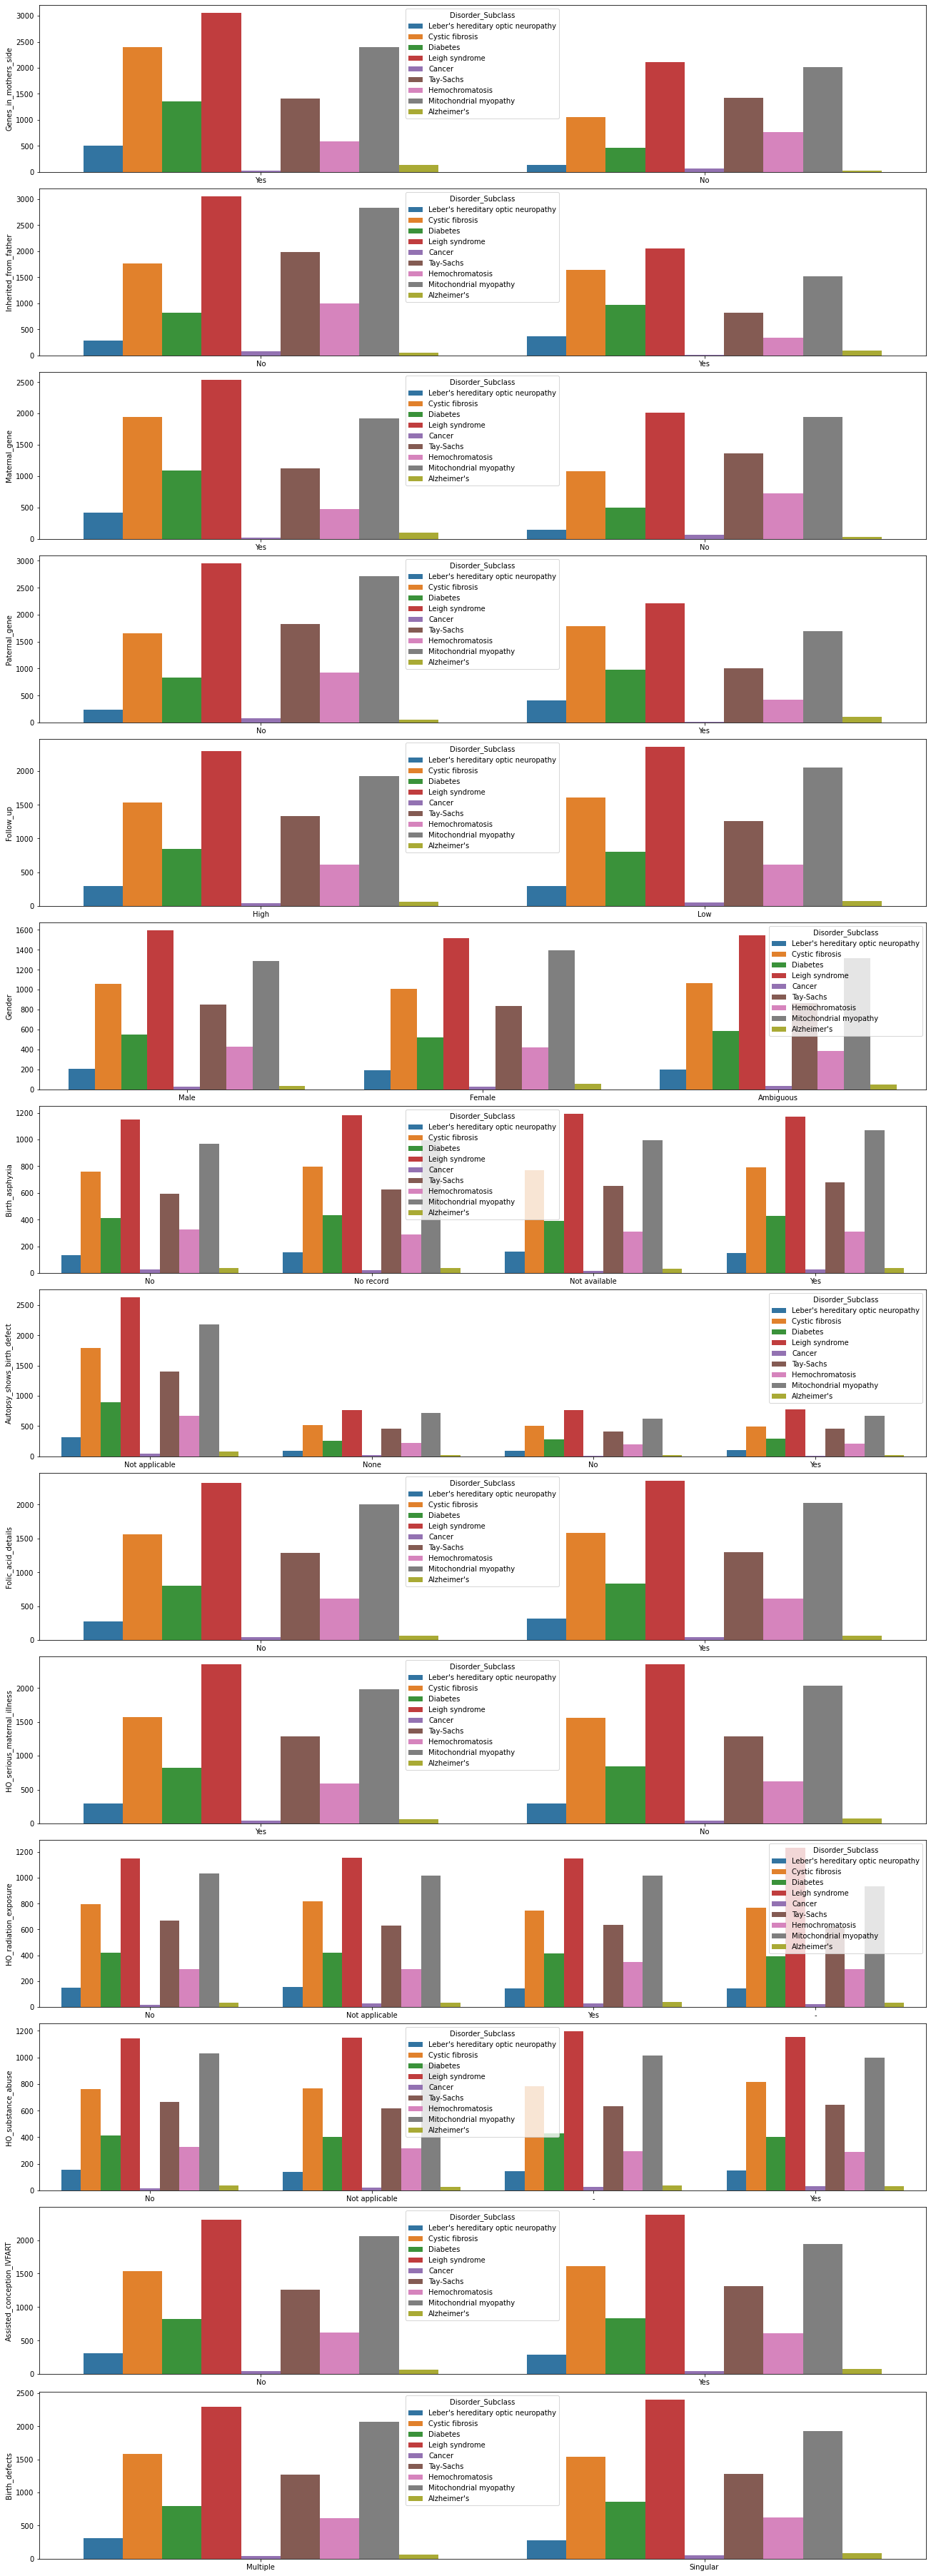

In [63]:
cols  = ['Genes_in_mothers_side', 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 
         'Follow_up', 'Gender', 'Birth_asphyxia', 'Autopsy_shows_birth_defect', 'Folic_acid_details', 'HO_serious_maternal_illness',
         'HO_radiation_exposure', 'HO_substance_abuse', 'Assisted_conception_IVFART', 'Birth_defects']

fig, ax = plt.subplots(len(cols),  figsize = (18, 50), constrained_layout = True)

for i, var in enumerate(cols): 
    sns.countplot(data = train, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

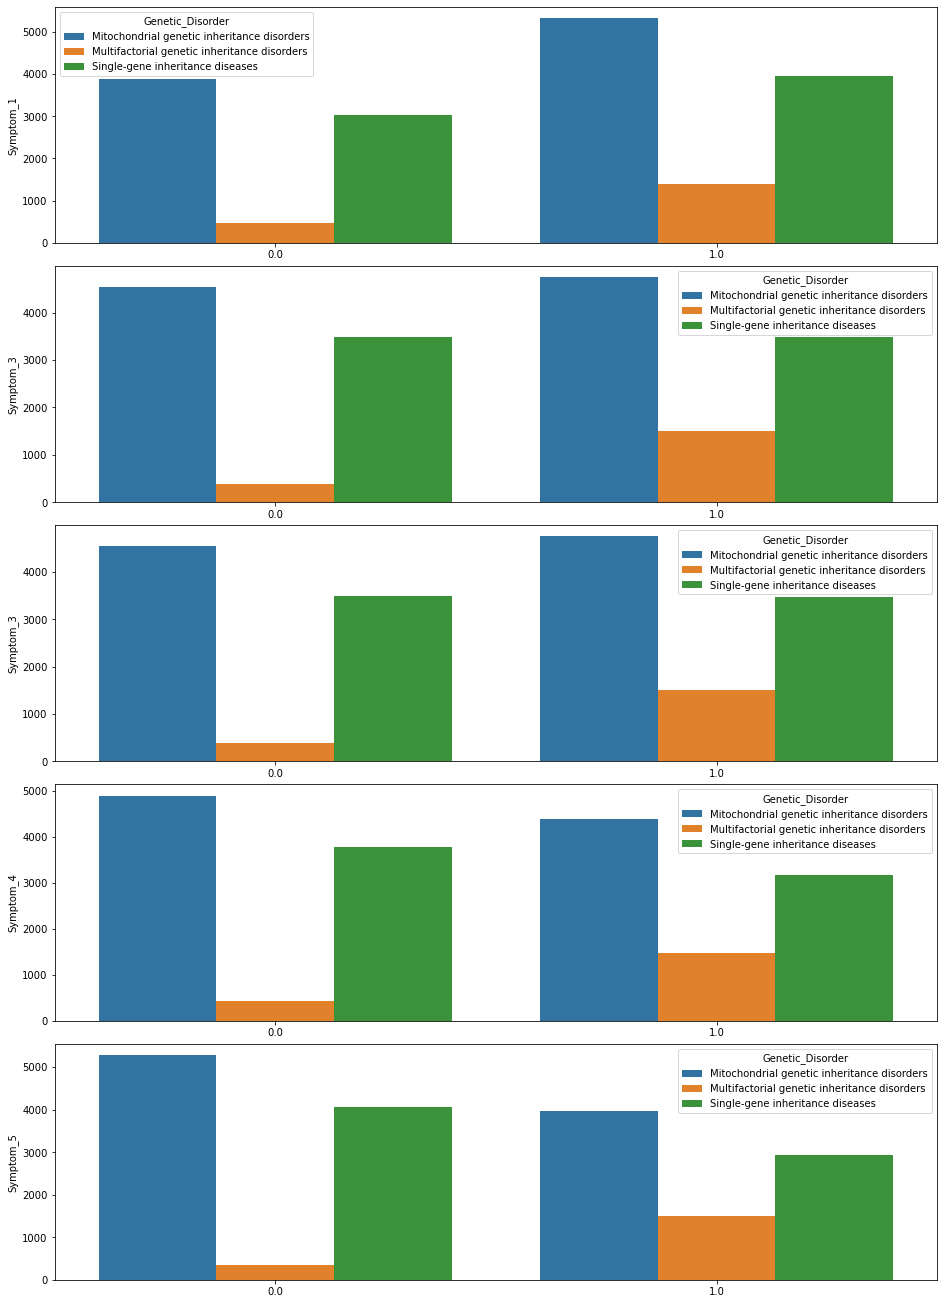

In [65]:
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (13, 18), constrained_layout = True)

for i, var in enumerate(symptom): 
    sns.countplot(data = train, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)